# Etap 2 KM 2 - inżynieria cech

In [33]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [16]:
warnings.filterwarnings('ignore')

In [54]:
data = pd.read_csv('../Data/our_data.csv')

In [73]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
)

cols = X.columns

So far zauważyliśmy:
- brak brakujących wartości  
- kolumna Compactness zdecydowanie do usunięcia i może kilka innych
- brak dużej ilości outlierów (tam wyżej niby były ale to taki rozkład był więc jednak nie)

## 1. USUNIĘCIE ZBĘDNYCH KOLUMN - korelacja > 0.97

In [90]:
#TO DO

## 2. ENCODING  
Zamiana zmiennej kategorycznej - nazw klas fasolek, przy użyciu one hot encoding

### 2.1 MODELOWANIE DWUSTOPNIOWE ENCODING - one vs. rest dla fasolki Bombay
Do modelu rozdzielającego Bombay od reszty transformujemy kolumnę zamieniając wartość na 1, gdy jest to bombay 0, gdy nie jest

In [74]:
y_train.head()

4990         SIRA
3361        SEKER
10806    DERMASON
9320        HOROZ
6645        HOROZ
Name: Class, dtype: object

In [75]:

y_train_b = y_train.map(lambda x: 1 if x == 'BOMBAY' else 0)
y_val_b = y_val.map(lambda x: 1 if x == 'BOMBAY' else 0)
y_test_b = y_test.map(lambda x: 1 if x == 'BOMBAY' else 0)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Create a RandomForestClassifier model
clf_b = RandomForestClassifier(n_estimators=1, max_depth=100, random_state=42)

# Train the model on the training data
clf_b.fit(X_train, y_train_b)

# Predictions on the validation set
y_val_pred = clf_b.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val_b, y_val_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = sklearn.metrics.f1_score(y_val_b, y_val_pred)
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_val_b, y_val_pred)

# Calculate recall
recall = recall_score(y_val_b, y_val_pred)

# Display precision and recall
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0


BOMBAY  
n_estimators = 1, max_depth = 100:  
Accuracy: 1.0  
F1 Score: 1.0  
Precision: 1.0  
Recall: 1.0  

n_estimators = 100, max_depth = 3:

Accuracy: 0.9995625546806649  
F1 Score: 0.9940828402366864  
Precision: 1.0  
Recall: 0.9882352941176471  

### 2.2 ONE VS ALL 
w sumie spróbujmy one vs rest dla wszystkich

In [53]:
y_train_s = y_train.map(lambda x: 1 if x == 'SEKER' else 0)
y_val_s = y_val.map(lambda x: 1 if x == 'SEKER' else 0)
y_test_s = y_test.map(lambda x: 1 if x == 'SEKER' else 0)

# Create a RandomForestClassifier model
clf = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train_s)

# Predictions on the validation set
y_val_pred = clf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val_s, y_val_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = sklearn.metrics.f1_score(y_val_s, y_val_pred)
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_val_s, y_val_pred)

# Calculate recall
recall = recall_score(y_val_s, y_val_pred)

# Display precision and recall
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9881889763779528
F1 Score: 0.9597615499254843
Precision: 0.9698795180722891
Recall: 0.9498525073746312


SEKER  
n = 30, max = 10 -> 0.6s  
Accuracy: 0.9881889763779528  
F1 Score: 0.9597615499254843  
Precision: 0.9698795180722891  
Recall: 0.9498525073746312  

n = 1, max = 100  
Accuracy: 0.9768153980752406  
F1 Score: 0.9212481426448736  
Precision: 0.9281437125748503  
Recall: 0.9144542772861357  

In [77]:
y_train_d = y_train.map(lambda x: 1 if x == 'DERMASON' else 0)
y_val_d = y_val.map(lambda x: 1 if x == 'DERMASON' else 0)
y_test_d = y_test.map(lambda x: 1 if x == 'DERMASON' else 0)

# Create a RandomForestClassifier model
clf_d = RandomForestClassifier(n_estimators=10, max_depth=70, random_state=42)

# Train the model on the training data
clf_d.fit(X_train, y_train_d)

# Predictions on the validation set
y_val_pred = clf_d.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val_d, y_val_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = sklearn.metrics.f1_score(y_val_d, y_val_pred)
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_val_d, y_val_pred)

# Calculate recall
recall = recall_score(y_val_d, y_val_pred)

# Display precision and recall
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9540682414698163
F1 Score: 0.9124270225187657
Precision: 0.9193277310924369
Recall: 0.9056291390728477


SPR czy SVM działa lepiej po usunięciu Bombaya:

In [ ]:
#TO FINISH

In [89]:
from sklearn.preprocessing import MinMaxScaler
#TO FINISH - REMOVE ROWS THAT WERE PREDICTED AS BOMBAY BY CLF_B
X_train_filtered = None
y_train_filtered = None
X_val_filtered = None
y_val_filtered = None

#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(y_train_filtered.to_frame())
#y_encoded_filtered = pd.DataFrame(enc.transform(y_train_filtered.to_frame()).toarray(),columns=enc.get_feature_names(['Class']))

scaling = MinMaxScaler()
X_train_filtered = scaling.fit_transform(X_train_filtered)

#tu encodowane dane dają błąd 
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=42, decision_function_shape='ovo').fit(X_train_filtered, y_train_filtered)
print("SVM accuracy: {:.2f}".format(svm.score(X_val_filtered, y_val_filtered)))
print("SVM f1 score: {:.2f}".format(sklearn.metrics.f1_score(y_val_filtered, svm.predict(X_val_filtered), average='weighted')))
#uwaga na zmiane parametrow bo moze sie robic kilka dni

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## 3 ENCODING DLA CAŁOŚCI + RÓZNE MODELE

In [18]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train.to_frame())
y_encoded = pd.DataFrame(enc.transform(y_train.to_frame()).toarray(),columns=enc.get_feature_names(['Class']))
y_val_encoded = pd.DataFrame(enc.transform(y_val.to_frame()).toarray(),columns=enc.get_feature_names(['Class']))
y_test_encoded = pd.DataFrame(enc.transform(y_test.to_frame()).toarray(),columns=enc.get_feature_names(['Class']))



## Usuwanie kolumn

In [57]:
# delete columns: ShapeFactor2,ShapeFactor4, Solidity, Extent 
X_train = X_train.drop(['Compactness','EquivDiameter', 'Area'], axis=1)
X_val = X_val.drop(['Compactness','EquivDiameter','Area'], axis=1)
X_test = X_test.drop(['Compactness','EquivDiameter','Area'], axis=1)
cols = X_train.columns
cols

Index(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation',
       'Eccentricity', 'ConvexArea', 'Extent', 'Solidity', 'roundness',
       'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

## Normalizacja

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)
X_val = scaling.transform(X_val)

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)
X_val = pd.DataFrame(X_val, columns=cols)

## Feature importance

Ranking cech: 
Cecha ShapeFactor1 (0.12502645446319363)
Cecha Perimeter (0.12159416767963888)
Cecha MajorAxisLength (0.10618202223512041)
Cecha ShapeFactor3 (0.10614009119912383)
Cecha MinorAxisLength (0.10351293763682637)
Cecha Eccentricity (0.09191695374526995)
Cecha ConvexArea (0.08310977700816398)
Cecha AspectRation (0.07872034026268912)
Cecha ShapeFactor2 (0.0696782399069942)
Cecha roundness (0.06237934374056106)
Cecha ShapeFactor4 (0.030733433404616664)
Cecha Solidity (0.01394435659905131)
Cecha Extent (0.007061882118750358)


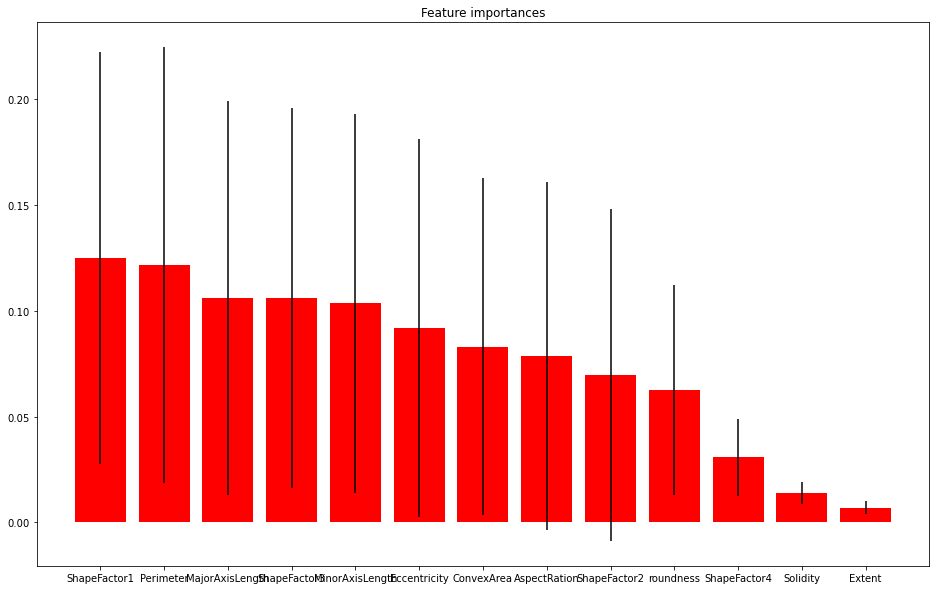

In [59]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

feature_importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(feature_importances)[::-1]



print("Ranking cech: ")
for i in range(X_train.shape[1]):
    print(f"Cecha {cols[indices[i]]} ({feature_importances[indices[i]]})")

plt.figure(figsize=(16,10))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [cols[i] for i in indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [60]:
#delete Extent and Solidity
X_train = X_train.drop(['Extent','Solidity'], axis=1)
X_val = X_val.drop(['Extent','Solidity'], axis=1)
X_test = X_test.drop(['Extent','Solidity'], axis=1)

# kodzenie

### Regresja logistyczna

In [82]:
#logistic regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_val)
print(f"Accuracy: {reg.score(X_val, y_val)}")

cm = confusion_matrix(y_val, y_pred)
print(f"confusion matrix:")
print(cm)

fig = px.imshow(confusion_matrix(y_val, y_pred),text_auto='.2f')
fig.show()

Accuracy: 0.9142607174103237
confusion matrix:
[[194   0   8   0   3   3  14]
 [  0  85   0   0   0   0   0]
 [  6   0 252   0  12   1   5]
 [  0   0   0 550   0  10  44]
 [  0   0   6   3 305   0   5]
 [  3   0   0   2   0 324  10]
 [  1   0   0  46   9   5 380]]


### SVM

In [84]:
#tu encodowane dane dają błąd 
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=42, decision_function_shape='ovo').fit(X_train, y_train)
print("SVM accuracy: {:.2f}".format(svm.score(X_val, y_val)))
print("SVM f1 score: {:.2f}".format(sklearn.metrics.f1_score(y_val, svm.predict(X_val), average='weighted')))
#uwaga na zmiane parametrow bo moze sie robic kilka dni
y_pred = svm.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(f"confusion matrix:")
print(cm)

fig = px.imshow(confusion_matrix(y_val, y_pred),text_auto='.2f')
fig.show()

SVM accuracy: 0.92
SVM f1 score: 0.92
confusion matrix:
[[198   0  10   0   3   2   9]
 [  0  85   0   0   0   0   0]
 [  5   0 251   0  14   1   5]
 [  0   0   0 556   0   9  39]
 [  0   0   8   1 305   0   5]
 [  3   0   0   1   0 325  10]
 [  1   0   0  47  11   4 378]]


SVM accuracy: 0.92
SVM f1 score: 0.92

### DecisionTreeClassifier

In [86]:
#tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10000, random_state=42)
tree.fit(X_train, y_encoded)
y_hat = tree.predict(X_val)
print("Tree accuracy: {:.2f}".format(tree.score(X_val, y_val_encoded)))
print("Tree f1 score: {:.2f}".format(sklearn.metrics.f1_score(y_val_encoded, y_hat, average='weighted')))


y_hat = enc.inverse_transform(y_hat)
cm = confusion_matrix(y_val, y_hat)
print(f"confusion matrix:")
print(cm)

fig = px.imshow(confusion_matrix(y_val, y_hat),text_auto='.2f')
fig.show()

Tree accuracy: 0.89
Tree f1 score: 0.89
confusion matrix:
[[191   0  17   1   5   3   5]
 [  0  85   0   0   0   0   0]
 [ 15   0 247   0  10   1   3]
 [  0   0   0 535   9  12  48]
 [  2   0  10   1 301   0   5]
 [  4   0   2  13   1 310   9]
 [  5   0   1  49  10   8 368]]


Tree accuracy: 0.89  
Tree f1 score: 0.89

In [63]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10000, random_state=42, criterion='gini')
tree.fit(X_train, y_encoded)
y_hat = tree.predict(X_val)
print("Tree accuracy: {:.2f}".format(tree.score(X_val, y_val_encoded)))
print("Tree f1 score: {:.2f}".format(sklearn.metrics.f1_score(y_val_encoded, y_hat, average='weighted')))

Tree accuracy: 0.89
Tree f1 score: 0.89


### Random Forest

In [64]:
#random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=42, criterion='gini')
forest.fit(X_train, y_encoded)
y_hat = forest.predict(X_val)
print("Forest accuracy: {:.2f}".format(forest.score(X_val, y_val_encoded)))
print("Forest f1 score: {:.2f}".format(sklearn.metrics.f1_score(y_val_encoded, y_hat, average='weighted')))

Forest accuracy: 0.91
Forest f1 score: 0.92


In [87]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=42, criterion='gini')
forest.fit(X_train, y_train)
y_hat = forest.predict(X_val)
print("Forest accuracy: {:.2f}".format(forest.score(X_val, y_val)))
print("Forest f1 score: {:.2f}".format(sklearn.metrics.f1_score(y_val, y_hat, average='weighted')))

cm = confusion_matrix(y_val, y_hat)
print(f"confusion matrix:")
print(cm)

fig = px.imshow(confusion_matrix(y_val, y_hat),text_auto='.2f')
fig.show()

Forest accuracy: 0.92
Forest f1 score: 0.92
confusion matrix:
[[203   0   6   0   3   2   8]
 [  0  85   0   0   0   0   0]
 [ 16   0 244   0  11   1   4]
 [  0   0   0 555   1   8  40]
 [  2   0   6   1 302   0   8]
 [  2   0   0   5   0 325   7]
 [  2   0   1  48   6   3 381]]


Niezakodowane dane dają lepszy wynik?